In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\DELL\Downloads\Ad_Spend_Sales.csv')
df

,Total_Ad_Budget,TV_Spend,Radio_Spend,Social_Spend,Search_Spend,Influencer_Spend,Email_Spend,Sales_or_Leads
0,828.12,257.70,79.05,195.07,115.93,85.92,94.46,100.95
1,603.50,198.45,90.88,121.48,56.17,50.22,86.30,71.89
2,782.64,218.45,66.41,182.86,144.00,89.09,81.83,87.88
3,679.36,206.60,85.39,152.24,111.09,74.11,49.94,78.62
4,800.22,269.25,76.71,184.29,148.34,54.03,67.61,75.63
...,...,...,...,...,...,...,...,...
65199,642.74,148.21,112.75,136.94,96.16,108.98,39.70,62.28
65200,549.17,136.91,92.77,138.97,79.67,50.67,50.17,51.44
65201,663.12,194.05,95.76,81.98,159.60,78.85,52.87,84.62
65202,646.72,150.39,73.45,174.06,106.31,91.25,51.26,89.00


In [11]:
df.isnull().sum()

Total_Ad_Budget     0
TV_Spend            0
Radio_Spend         0
Social_Spend        0
Search_Spend        0
Influencer_Spend    0
Email_Spend         0
Sales_or_Leads      0
dtype: int64

In [12]:
df.dtypes

Total_Ad_Budget     float64
TV_Spend            float64
Radio_Spend         float64
Social_Spend        float64
Search_Spend        float64
Influencer_Spend    float64
Email_Spend         float64
Sales_or_Leads      float64
dtype: object

In [13]:
duplicates = df.duplicated()
df.duplicated().sum()

0

In [14]:
df.columns

Index(['Total_Ad_Budget', 'TV_Spend', 'Radio_Spend', 'Social_Spend',
       'Search_Spend', 'Influencer_Spend', 'Email_Spend', 'Sales_or_Leads'],
      dtype='object')

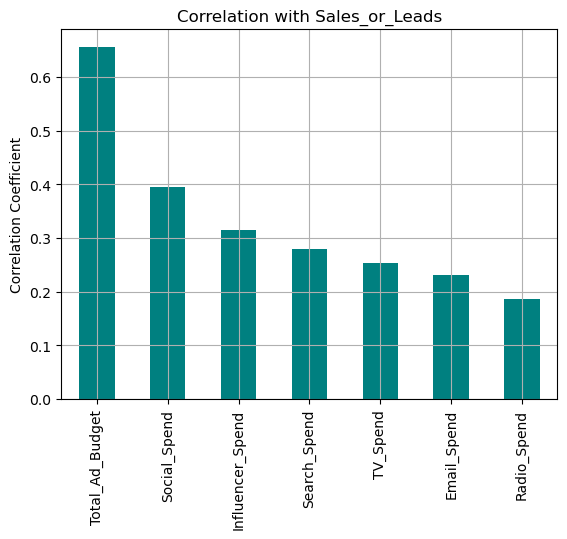

In [9]:
corr = df.corr()['Sales_or_Leads'].drop('Sales_or_Leads').sort_values(ascending=False)
corr.plot(kind='bar', color='teal')
plt.title('Correlation with Sales_or_Leads')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()


In [17]:
x = df[['Total_Ad_Budget', 'Social_Spend', 'Influencer_Spend']]
y = df[['Sales_or_Leads']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=54)


In [18]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = model.predict(x_test)

In [26]:
Total_Ad_Budget = 250.0
Social_Spend = 100.05
Influencer_Spend= 258.07	
input_data = pd.DataFrame([[Total_Ad_Budget, Social_Spend,Influencer_Spend]],columns=['Total_Ad_Budget', 'Social_Spend','Influencer_Spend']) 
predicted_Sales_or_Leads = model.predict (input_data)
print(f" prdeicted_Sales_or_Leads {prdeicted_Sales_or_Leads .flatten()[0]:,.2f}")


 prdeicted_Sales_or_Leads 106.95


In [29]:
mse = mean_squared_error(y_test,y_pred)
print(f"mse: {mse:.2f}")

mse: 106.36


In [30]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.46007636835281407


In [32]:
import joblib

In [33]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [34]:
joblib.dump(model,'add_model.pkl')

['add_model.pkl']